# Alternative Models
We'll take a look at some of the other models we can use as an alternative to Linear Regression to predict our Dependent Variable. 

## Import Data Exploration Tools

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
alternative_metrics = []

## Decision Tree Regressor

The first alternative analysis to traditional regression that we will do is a Decision Tree Regressor.  Decision trees build models in the form of tree structures.  The data is split according to certain parameters (selected by the algorithm) into separate nodes.  The depth of the tree determines how many layers (or branches) of the tree we have.   

In [2]:
df = pd.read_csv('cancer_reg_cleaned.csv', index_col=[0])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics

In [4]:
X = df.drop('TARGET_deathRate', axis=1)
y = df['TARGET_deathRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1989)

One of the biggest problems we can have with decision trees is that they will tend to over-fit our models.  In fact, if we put no restrictions on the depth of our decision tree, we will see a RMSE of 0, as the tree will perfectly fit to our train data.   

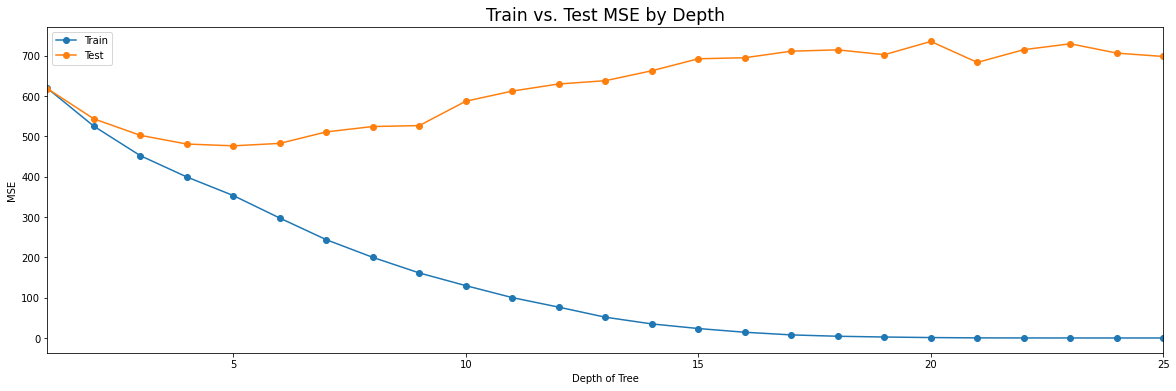

In [5]:
dtree_results = []

for i in range(1, len(X_train.columns)+1):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_train)
    test_predictions = dtree.predict(X_test)
    MSE = metrics.mean_squared_error(y_train, predictions)
    MSE_test = metrics.mean_squared_error(y_test, test_predictions)
    dtree_results.append([i, MSE, MSE_test])

dtree_results = pd.DataFrame(dtree_results, columns=['Depth', 'Train Results', 'Test Results'])
plt.figure(figsize=(20,6))
plt.plot(dtree_results['Depth'], dtree_results[['Train Results', 'Test Results']], marker='o', label=['Train', 'Test'])
plt.title('Train vs. Test MSE by Depth', size='xx-large')
plt.xlabel('Depth of Tree')
plt.xlim(1, 25)
plt.ylabel('MSE')
plt.legend()
plt.show()

We can see above that the train data begins over-fitting almost immediately.  By the 4th layer we start to see the actual direction of the errors begin to diverge.  We'll limit this tree to a depth of 4.

In [6]:
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

r2 = metrics.r2_score(y_true = y_test, y_pred = dtree_predict)
MAE = metrics.mean_absolute_error(y_test, dtree_predict)
MSE = metrics.mean_squared_error(y_test, dtree_predict)
RMSE = np.sqrt(MSE)

print('R-Squared: {:.2%}'.format(r2))
print('MAE: {:.2f}'.format(MAE))
print('MSE: {:.2f}'.format(MSE))
print('RMSE: {:.2f}'.format(RMSE))

DTree = {'metric': 'DTree', 'r2': r2, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
alternative_metrics.append(DTree)

R-Squared: 34.89%
MAE: 16.76
MSE: 480.78
RMSE: 21.93


To visualize what exactly our decision tree is doing we can create a graphical representation of the tree (only displaying first three layers of the tree).

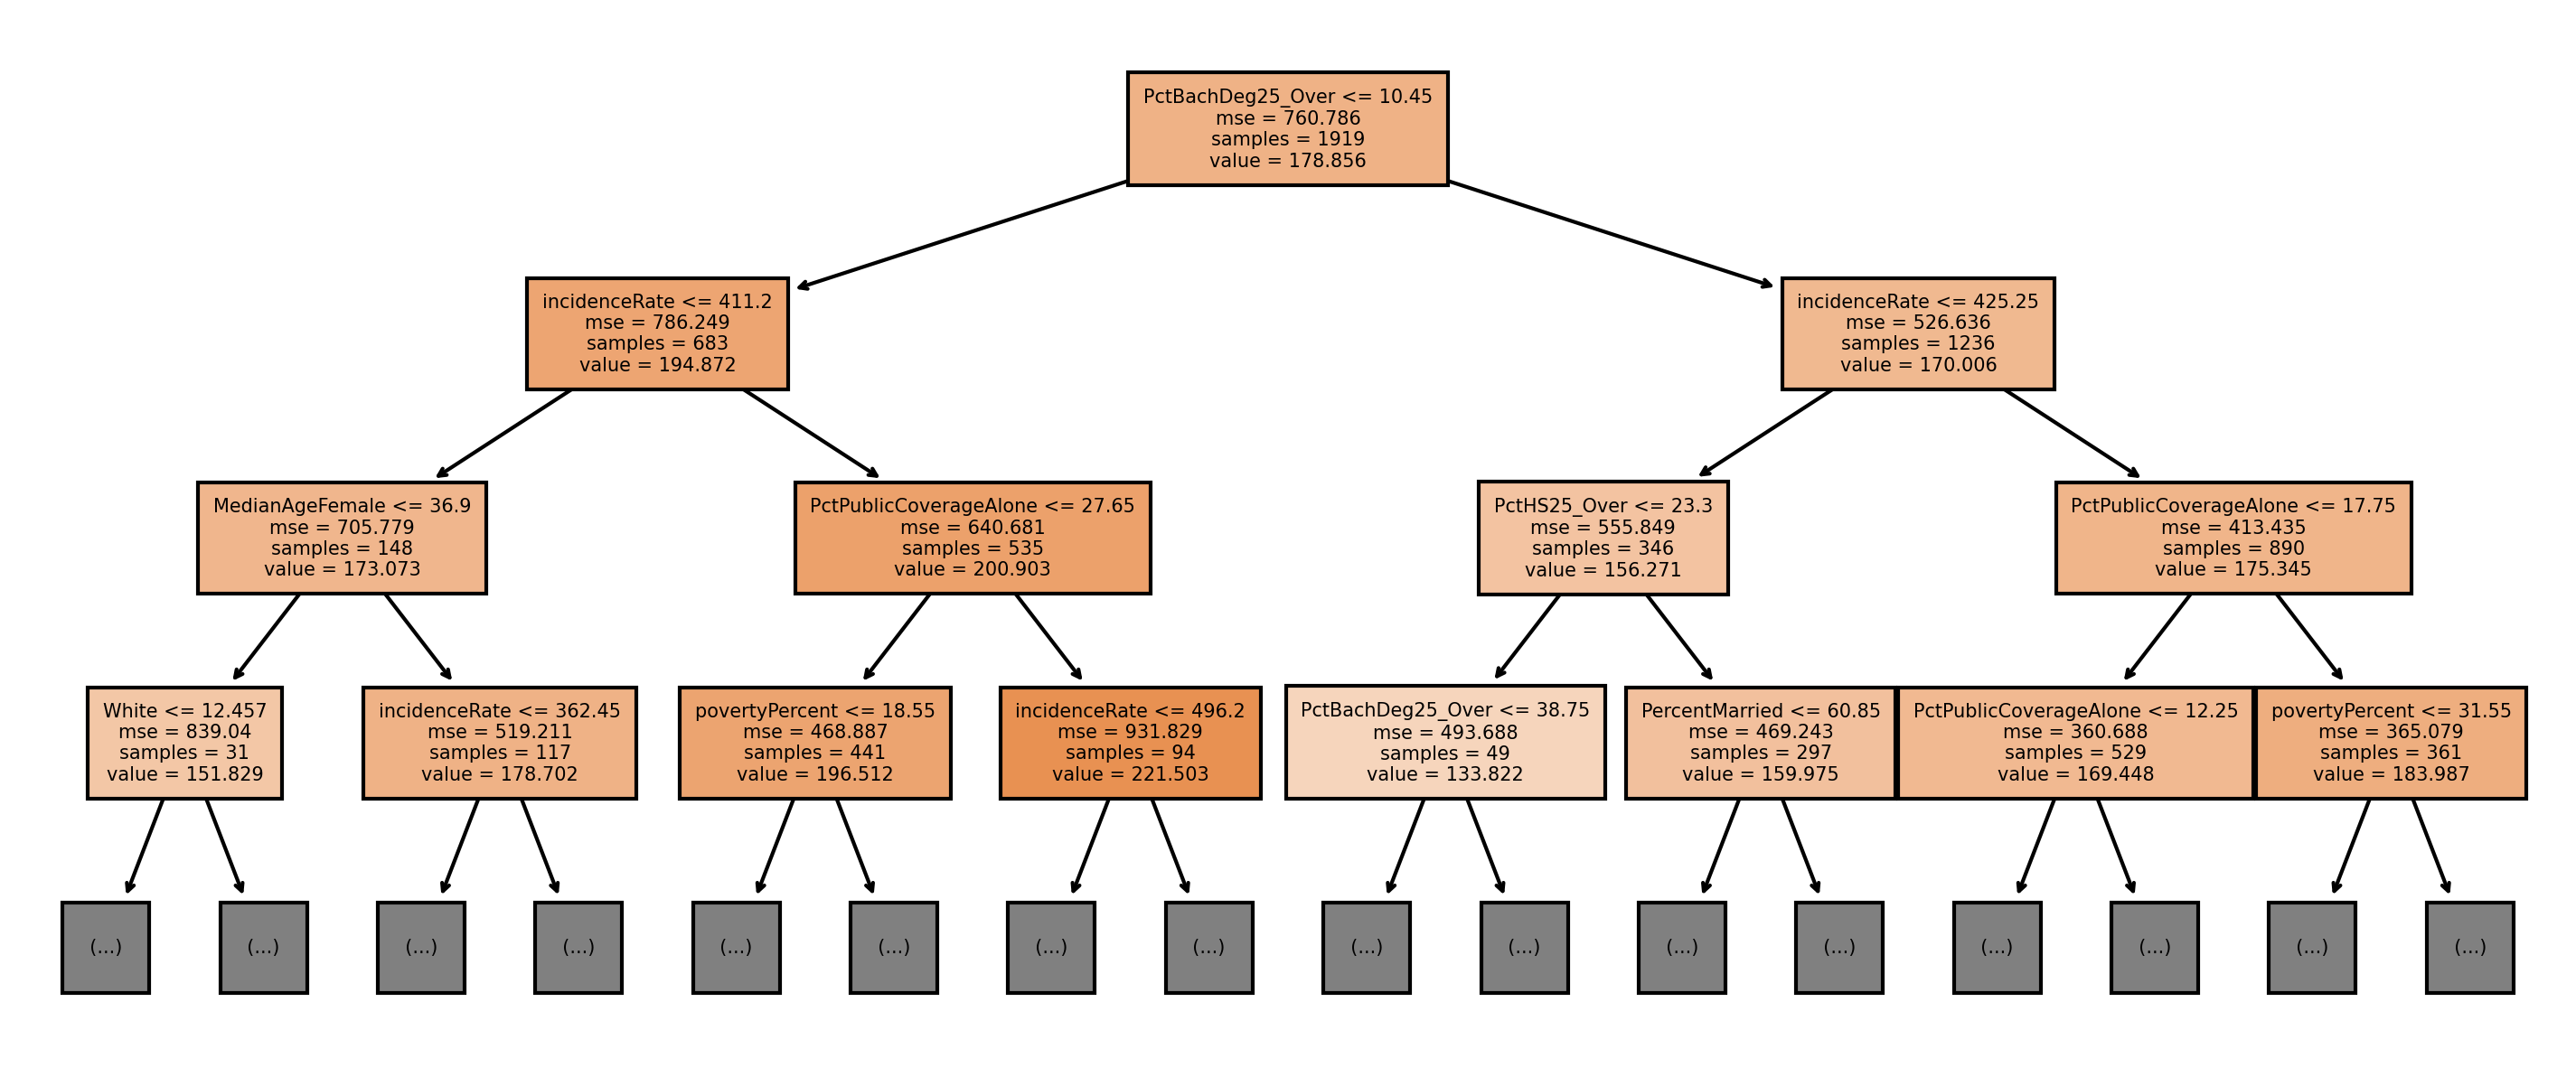

In [7]:
features = X_train.columns
target = y_train
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,5), dpi=300)

tree.plot_tree(dtree, feature_names=features, filled=True, max_depth=3, fontsize=5)
plt.show()

## Random Forest Regressor

A RandomForest is an example of ensemble learning.  A RandomForest will take random samples of the training data set and random subsets of features to build out a number of different trees. For regression, averaging of all the trees is used to determine the final prediction. 

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
forest_results_depth = []

for i in range(1, len(X_train.columns)+1):
    forest = RandomForestRegressor(n_estimators=100, max_depth=i)
    forest.fit(X_train, y_train)
    predictions_train = forest.predict(X_train)
    predictions_test = forest.predict(X_test)
    MSE_train = metrics.mean_squared_error(y_train, predictions_train)
    MSE_test = metrics.mean_squared_error(y_test, predictions_test)
    forest_results_depth.append([i, MSE_train, MSE_test])

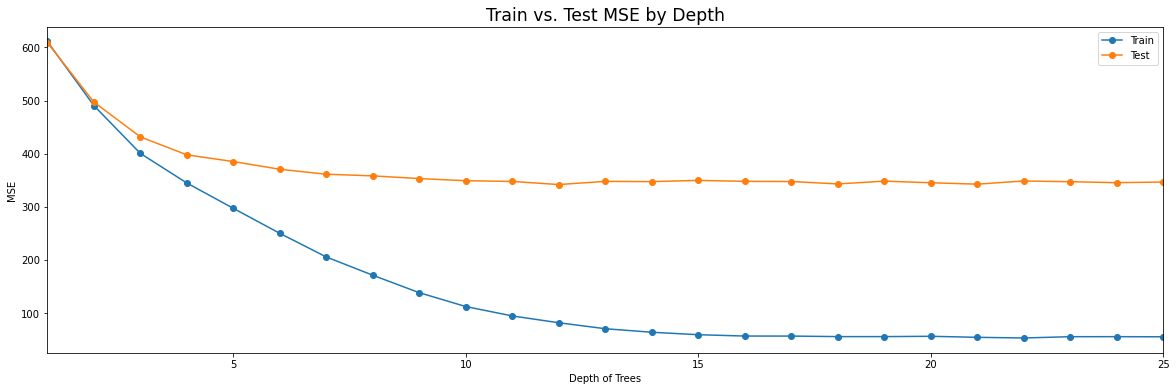

In [10]:
forest_results_depth = pd.DataFrame(forest_results_depth, columns=['Depth', 'Train Results', 'Test Results'])
plt.figure(figsize=(20,6))
plt.plot(forest_results_depth['Depth'], forest_results_depth[['Train Results', 'Test Results']], 
         marker='o', label=['Train', 'Test'])
plt.legend()
plt.title('Train vs. Test MSE by Depth', size='xx-large')
plt.xlabel('Depth of Trees')
plt.xlim(1, 25)
plt.ylabel('MSE')
plt.show()   

In [11]:
forest = RandomForestRegressor(n_estimators=100, max_depth=9)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [12]:
r2 = metrics.r2_score(y_true = y_test, y_pred = forest_pred)
MAE = metrics.mean_absolute_error(y_test, forest_pred)
MSE = metrics.mean_squared_error(y_test, forest_pred)
RMSE = np.sqrt(MSE)

print('R-Squared: {:.2%}'.format(r2))
print('MAE: {:.2f}'.format(MAE))
print('MSE: {:.2f}'.format(MSE))
print('RMSE: {:.2f}'.format(RMSE))

RForest = {'metric': 'RForest', 'r2': r2, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
alternative_metrics.append(RForest)

R-Squared: 52.45%
MAE: 14.06
MSE: 351.16
RMSE: 18.74


## SVM Regression

Support Vector Machines are more traditionally used for classification, but can be used for regression as well.  The concepts behind SVM for regression are the same as for classification.  While other linear regression models try to minimize the error between the predicted and the actual value, Support Vector Regression tries to fit the best line within a predefined or threshold error value. In SVM regression, the best fit line is the hyperplane in n-dimensional space that has the maximum number of points.  

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [14]:
df = pd.read_csv('cancer_reg_cleaned.csv', index_col=[0])
X = df.drop('TARGET_deathRate', axis=1)
y = df['TARGET_deathRate']

We have to scale our data for SVM

In [15]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=1989)

We'll do a quick grid search to ensure we optimize our hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [18]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [19]:
svr_model = SVR(C=1, gamma=0.01, kernel='rbf')
svr_model.fit(X_train, y_train.ravel())

SVR(C=1, gamma=0.01)

In [20]:
svr_pred = svr_model.predict(X_test)

In [21]:
un_scaled_y_test = scaler_y.inverse_transform(y_test)
un_scaled_predictions = scaler_y.inverse_transform(svr_pred)

In [22]:
r2 = metrics.r2_score(y_true = un_scaled_y_test, y_pred = un_scaled_predictions)
MAE = metrics.mean_absolute_error(un_scaled_y_test, un_scaled_predictions)
MSE = metrics.mean_squared_error(un_scaled_y_test, un_scaled_predictions)
RMSE = np.sqrt(MSE)

print('R-Squared: {:.2%}'.format(r2))
print('MAE: {:.2f}'.format(MAE))
print('MSE: {:.2f}'.format(MSE))
print('RMSE: {:.2f}'.format(RMSE))

SVR = {'metric': 'SVR', 'r2': r2, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
alternative_metrics.append(SVR)

R-Squared: 52.93%
MAE: 13.62
MSE: 347.57
RMSE: 18.64


### Gradient Boosting Regression

Gradient Boosting Regression is an ensemble of weak prediction models. Gradient boosting works by building simpler prediction models sequentially where each model tries to predict the error left over by the previous model.

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

In [24]:
df = pd.read_csv('cancer_reg_cleaned.csv', index_col=[0])
X = df.drop('TARGET_deathRate', axis=1)
y = df['TARGET_deathRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1989)

First I'll attempt to optimize some of my boosting parameters.

In [25]:
param_test1 = {'n_estimators':range(20,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                                               min_samples_split=500, 
                                                               min_samples_leaf=50,
                                                               max_depth=8,                                                        
                                                               subsample=0.8, 
                                                               random_state=1989),
                        param_grid = param_test1, scoring='r2', n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train.ravel())

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=1989,
                                                 subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 101, 10)},
             scoring='r2')

In [26]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 70}, 0.48481642274375314)

Next I will attempt to optimize some of our tree parameters.

In [27]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                                               n_estimators=70, 
                                                               max_features='sqrt', 
                                                               subsample=0.8, 
                                                               random_state=1989), 
                        param_grid = param_test2, scoring='r2', n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train.ravel())
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 7, 'min_samples_split': 800}, 0.47710736997854764)

I will now run our model with the optimized parameters

In [28]:
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=7, min_samples_split=800, learning_rate=0.1)
gbr.fit(X_train, y_train.ravel())
gbr_predict = gbr.predict(X_test)

In [29]:
r2 = metrics.r2_score(y_true = y_test, y_pred = gbr_predict)
MAE = metrics.mean_absolute_error(y_test, gbr_predict)
MSE = metrics.mean_squared_error(y_test, gbr_predict)
RMSE = np.sqrt(MSE)

print('R-Squared: {:.2%}'.format(r2))
print('MAE: {:.2f}'.format(MAE))
print('MSE: {:.2f}'.format(MSE))
print('RMSE: {:.2f}'.format(RMSE))

GBR = {'metric': 'GBR', 'r2': r2, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
alternative_metrics.append(GBR)

R-Squared: 51.60%
MAE: 14.18
MSE: 357.40
RMSE: 18.90


Let's take a look at how our model ranked our features.

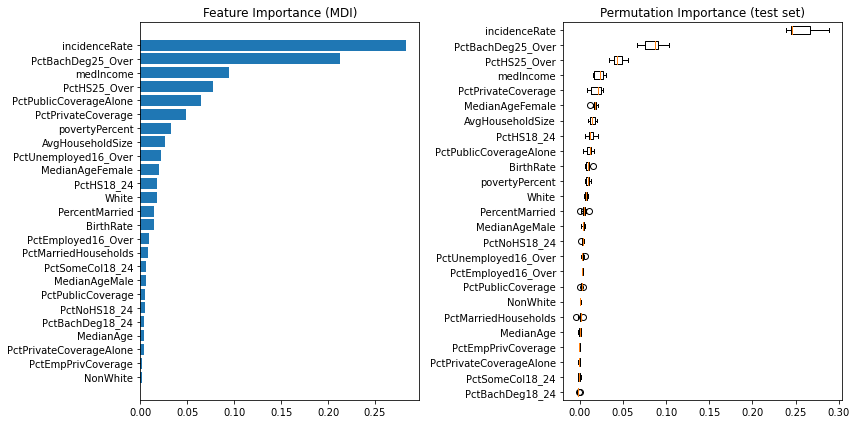

In [32]:
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(gbr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [33]:
#export alternative model metrics
alternative_metrics = pd.DataFrame(alternative_metrics)
alternative_metrics.set_index('metric')
alternative_metrics.to_csv('alternative_metrics.csv')